<a href="https://colab.research.google.com/github/kmalicekim/NLP_practice_mine/blob/master/7.%20%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 7.2 사이킷런을 미용한 토픽 모델링

### 7.2.1 데이터 준비

In [72]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_train= fetch_20newsgroups(subset='train')
newsgroups_train.target_names


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [73]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space', 
              'comp.sys.ibm.pc.hardware', 'sci.crypt', 'rec.sport.hockey']

# 학습 데이터셋을 가져옴
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

print('#Train set size:', len(newsgroups_train.data))
print('#Selected categories:', newsgroups_train.target_names)

#Train set size: 3819
#Selected categories: ['alt.atheism', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'rec.sport.hockey', 'sci.crypt', 'sci.space', 'talk.religion.misc']


In [74]:
newsgroups_train.data[:5]

["From: michael@jester.GUN.de (Michael Gerhards)\nDistribution: world\nSubject: Re: HELP: my pc freezes!\nX-Newsreader: TIN [version 1.1 PL8]\nOrganization: private COHERENT system\nLines: 15\n\nPerry Egelmeers (perry@wswiop11.win.tue.nl) wrote:\n> ladanyi@cs.cornell.edu (La'szlo' Lada'nyi) writes:\n\n> >Problem: Occasionaly the machine freezes. At least that's what I thought, but\n> >recently I discovered that the machine works, just the keyboard freezes and\n> >the clock drops down from turbo (33Mhz) to standard (16Mhz) mode.\n\n> Perhaps you hit the ^S (Control S)?  Try ^Q.\n> I know it doesn't explain the clock rate drop...\n\nWe had the same problem in our company. We changed the keyboard-bios and\nafter that, everything went fine. Our dealer told us that some boards of\nthat series have a defect kbd-bios.\n\nMichael\n--\n*  michael@jester.gun.de  *   Michael Gerhards   *   Preussenstrasse 59  *\n                          *  Germany 4040 Neuss  *  Voice: 49 2131 82238 *\n",
 'From

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

# \w - 문자+숫자(alphanumeric)와 매치, [a-zA-Z0-9_]와 동일한 표현식이다.
cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words='english', 
                     max_features=2500, min_df=5, max_df=0.5)

review_cv = cv.fit_transform(newsgroups_train.data)

print(review_cv[:5])

<>:4: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \w
<ipython-input-75-509eaf0108d9>:4: DeprecationWarning: invalid escape sequence \w
  cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words='english',


  (0, 1399)	5
  (0, 983)	2
  (0, 678)	1
  (0, 2467)	1
  (0, 1023)	1
  (0, 1493)	1
  (0, 2272)	1
  (0, 2376)	1
  (0, 1649)	1
  (0, 1731)	1
  (0, 1623)	2
  (0, 2440)	1
  (0, 2306)	1
  (0, 2479)	1
  (0, 1737)	2
  (0, 1314)	2
  (0, 2246)	1
  (0, 2259)	1
  (0, 1840)	1
  (0, 667)	1
  (0, 2465)	1
  (0, 1182)	1
  (0, 439)	2
  (0, 2307)	1
  (0, 2122)	1
  :	:
  (3, 1405)	1
  (3, 1117)	1
  (4, 678)	1
  (4, 1023)	1
  (4, 2343)	1
  (4, 1490)	1
  (4, 2245)	1
  (4, 1501)	1
  (4, 1698)	1
  (4, 1050)	1
  (4, 456)	3
  (4, 1303)	1
  (4, 1296)	1
  (4, 1281)	1
  (4, 1885)	1
  (4, 965)	1
  (4, 2086)	1
  (4, 1906)	1
  (4, 934)	1
  (4, 2424)	1
  (4, 1142)	1
  (4, 1201)	1
  (4, 1481)	1
  (4, 2005)	1
  (4, 663)	1


### 7.2.2 LDA 토픽 모델링 실행

In [76]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np 
np.set_printoptions(precision=3)

lda = LatentDirichletAllocation(n_components= 10,   # 추출할 topic의 수 
                                max_iter = 5, # 알고리즘의 최대 반복 횟수
                                topic_word_prior = 0.1, # topic의 사전 단어분포를 결정
                                doc_topic_prior= 1.0,   # 문서의 사전 topic분포를 결정  
                                learning_method='online',  # batch : online에 비해 성능이 더 좋으나 느림
                                n_jobs= -1,  #사용 processor 수(-1: 가능한 모든 프로세서 사용). default는 1
                                random_state=0)

review_topics = lda.fit_transform(review_cv)

print('#shape of review_topics:', review_topics.shape)
print('#sample of review_topics:', review_topics[0])

gross_topic_weights = np.mean(review_topics, axis=0)
print('#sum of topic weights of documents:', gross_topic_weights)

print('#shape of topic word distribution:', lda.components_.shape)  # (topic개수, max_features)


#shape of review_topics: (3819, 10)
#sample of review_topics: [0.042 0.037 0.536 0.021 0.032 0.031 0.02  0.027 0.229 0.026]
#sum of topic weights of documents: [0.097 0.122 0.106 0.132 0.11  0.058 0.088 0.118 0.084 0.085]
#shape of topic word distribution: (10, 2500)


In [77]:
print(review_topics[1][:])

print() 

print(lda.components_[:2])

[0.043 0.125 0.555 0.038 0.049 0.023 0.031 0.086 0.032 0.018]

[[1.029e-01 3.499e-01 1.236e+00 ... 1.004e-01 1.005e-01 1.002e-01]
 [1.005e-01 3.937e+01 2.242e+01 ... 1.043e-01 1.242e+02 7.023e+01]]


In [78]:
def print_top_words(model, feature_names, n_top_words):
  for topic_idx, topic in enumerate(model.components_):
    print(f'Topic #{topic_idx}:', end=' ')
    print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1: -1]]))  #slicing에서 맨 뒤 -1은 역순을 의미. 역순으로 했을 때 처음부터 n_top_words까지

  print()

print_top_words(lda, cv.get_feature_names_out(), 13)


Topic #0: key, encryption, clipper, chip, government, use, public, keys, security, privacy, com, law, escrow
Topic #1: com, just, don't, like, article, think, it's, access, people, i'm, going, know, can't
Topic #2: drive, scsi, card, disk, com, controller, ide, bus, hard, use, windows, drives, does
Topic #3: god, people, don't, jesus, say, think, does, believe, christian, bible, just, life, com
Topic #4: team, game, hockey, play, nhl, season, games, year, players, period, pts, new, pittsburgh
Topic #5: article, university, islam, cwru, van, western, com, islamic, book, chi, posting, cal, host
Topic #6: graphics, image, file, available, mail, information, ftp, files, software, data, program, internet, pub
Topic #7: com, university, host, posting, nntp, article, know, distribution, thanks, reply, i'm, need, computer
Topic #8: com, article, jim, brian, question, posting, newsreader, know, time, frank, wrote, org, reply
Topic #9: space, nasa, gov, launch, earth, orbit, moon, satellite, lun

In [79]:
# argsort() : https://www.geeksforgeeks.org/numpy-argsort-in-python/

a = np.array([1.5, 0.2, 4.2, 2.5])
s = a.argsort()

print(s)
print(a[s])

# a는 정렬되지 않은 숫자들의 어레이입니다.
# a.argsort()는 어레이 a를 정렬하는 인덱스의 어레이 [1 0 3 2]를 반환합니다.
# a[s]와 같이 인덱스의 어레이 s를 사용해서 어레이 a를 다시 정렬하면,
# 오름차순으로 정렬된 어레이 [0.2 1.5 2.5 4.2]가 됩니다.

[1 0 3 2]
[0.2 1.5 2.5 4.2]


In [80]:
# ex)
import numpy as np
a = np.array([3, 1.3, 5.7, 0.2])

# print(a[:-3:-1])
print(a.argsort())
print(a.argsort()[:-3:-1])

[3 1 0 2]
[2 0]


### 7.2.2 최적의 토픽 수 선택하기

n_components: 6, perplexity: 1216.375
n_components: 7, perplexity: 1215.644
n_components: 8, perplexity: 1224.125
n_components: 9, perplexity: 1208.056
n_components: 10, perplexity: 1181.733
n_components: 11, perplexity: 1176.414
n_components: 12, perplexity: 1188.870
n_components: 13, perplexity: 1188.711
n_components: 14, perplexity: 1171.418
n_components: 15, perplexity: 1176.919


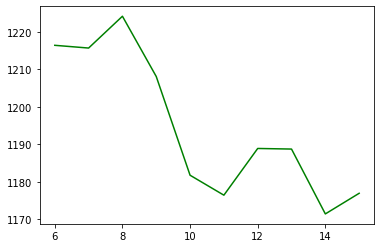

n_components with minimum perplexity: 14


In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

# 혼란도 --- 값이 낮을수록 좋음
def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior=0.1,  # max_iter는 최소 5이상의 값을 주는것이 좋음
                    doc_topic_prior=1.0):
  iter_num = []
  per_value = []

  for i in range(start, end+1):
    lda = LatentDirichletAllocation(n_components = i, max_iter=max_iter,
                                    topic_word_prior = topic_word_prior,
                                    doc_topic_prior=doc_topic_prior,
                                    learning_method='batch', n_jobs= -1,
                                    random_state=7)
    lda.fit(cv)
    iter_num.append(i)
    pv = lda.perplexity(cv) 
    per_value.append(pv)
    print(f'n_components: {i}, perplexity: {pv:.3f}')


  plt.plot(iter_num, per_value, 'g-')
  plt.show()
  return start + per_value.index(min(per_value))

print("n_components with minimum perplexity:",
      show_perplexity(review_cv, start=6, end=15))
    


In [82]:
lda = LatentDirichletAllocation(n_components=8,  # 추출할 topic의 수 지정
                                max_iter=20, 
                                topic_word_prior=0.1,
                                doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs=-1,
                                random_state=7)

review_topics = lda.fit_transform(review_cv)

print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: people, god, don't, think, just, say, does, believe, like, jesus
Topic #1: scsi, hockey, team, nhl, players, ide, game, university, bus, article
Topic #2: space, nasa, drive, gov, launch, access, disk, earth, ___, moon
Topic #3: key, chip, encryption, clipper, com, government, keys, use, security, public
Topic #4: com, article, don't, keith, think, posting, morality, nntp, host, caltech
Topic #5: image, available, file, software, use, data, information, graphics, mail, ftp
Topic #6: com, posting, host, nntp, university, article, know, i'm, thanks, distribution
Topic #7: game, play, period, win, year, power, team, goal, pts, new



## 7.3 Gensim을 이용한 토픽 모델링

### 7.3.1 Gensim 사용법과 시각화

In [83]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
# Gensim은 텍스트에 대한 토큰화 결과를 입력으로 사용함

# 필요한 library들을 import
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('stopwords')

cachedStopWords = stopwords.words("english")

RegTok = RegexpTokenizer('[\w]{3,}')  # 정규표현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) # 영어 불용어를 가져옴


def tokenizer(text):
  tokens = RegTok.tokenize(text.lower())
  words = [word for word in tokens if (word not in english_stops) and len(word)>2]
  return words 


texts = [tokenizer(news) for news in newsgroups_train.data]

<>:11: DeprecationWarning: invalid escape sequence \w
<>:11: DeprecationWarning: invalid escape sequence \w
<>:11: DeprecationWarning: invalid escape sequence \w
<ipython-input-84-60bc7e5f7e92>:11: DeprecationWarning: invalid escape sequence \w
  RegTok = RegexpTokenizer('[\w]{3,}')  # 정규표현식으로 토크나이저를 정의
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
from gensim.corpora.dictionary import Dictionary 

# 토큰화 결과로부터 dictionary 생성 
dictionary = Dictionary(texts)
print('#Number of initial unique words in documents:', len(dictionary))

# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고, 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)   #keep_n = max_features에 해당 / no_below = min_df, no_above = max_df에 해당
print('#Number of unique words after removing rare and common words:', len(dictionary))

# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts]  #doc2bow() : scikitlearn의 CountVectorizer와 같은 기능을 함
print('#Number of unique tokens: {}'.format(len(dictionary)))
print('#Number of documents: {}'.format(len(corpus)))


#Number of initial unique words in documents: 49768
#Number of unique words after removing rare and common words: 2000
#Number of unique tokens: 2000
#Number of documents: 3819


In [86]:
from gensim.models import LdaModel 

num_topics= 10
passes = 5

#passes : scikitlearn의 max_iter와 같음
%time model = LdaModel(corpus=corpus, id2word=dictionary, \
                       passes=passes, num_topics=num_topics, \
                       random_state=7)

CPU times: user 29.2 s, sys: 105 ms, total: 29.3 s
Wall time: 38.1 s


In [87]:
# gensim은 "각 토픽의 상위 비중 단어"를 보여주는 print_topics() 메서드 지원
# num_topics : 보고 싶은 토픽의 수
# num_words : 각 토픽의 상위 단어 수 

model.print_topics(num_words=10) # 각 토픽의 번호, 토픽의 상위 비중 단어, 비중

[(0,
  '0.036*"scsi" + 0.034*"drive" + 0.016*"ide" + 0.016*"controller" + 0.015*"disk" + 0.013*"hard" + 0.012*"drives" + 0.011*"bus" + 0.010*"henry" + 0.010*"system"'),
 (1,
  '0.031*"space" + 0.020*"nasa" + 0.011*"gov" + 0.009*"would" + 0.008*"launch" + 0.008*"moon" + 0.007*"earth" + 0.007*"orbit" + 0.006*"first" + 0.006*"access"'),
 (2,
  '0.014*"team" + 0.012*"game" + 0.012*"hockey" + 0.010*"play" + 0.008*"nhl" + 0.008*"university" + 0.007*"season" + 0.007*"year" + 0.007*"would" + 0.007*"games"'),
 (3,
  '0.032*"com" + 0.019*"sgi" + 0.018*"keith" + 0.017*"caltech" + 0.012*"system" + 0.012*"livesey" + 0.012*"one" + 0.011*"netcom" + 0.010*"jon" + 0.010*"think"'),
 (4,
  '0.023*"key" + 0.015*"encryption" + 0.013*"clipper" + 0.013*"chip" + 0.010*"government" + 0.008*"would" + 0.008*"keys" + 0.008*"com" + 0.008*"security" + 0.008*"use"'),
 (5,
  '0.018*"image" + 0.013*"university" + 0.009*"color" + 0.008*"images" + 0.008*"gif" + 0.007*"program" + 0.007*"one" + 0.007*"points" + 0.006*"pro

In [88]:
# get_document_topic 메서드 : 인수로 넘긴 문서들(카운트벡터)에 대해 토픽 분포를 반환
# minumum_probability로 보여질 토픽의 비중에 대한 임계값 설정 가능

print('#topic distribution of the first documents:', model.get_document_topics(corpus)[0])

#topic distribution of the first documents: [(0, 0.35217342), (8, 0.63272625)]


In [89]:
# pyLDAvis : gensim의 토픽모델링 결과를 시각화하는 패키지

!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# LDA 모형을 pyLDAvis 객체에 전달
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.105849 -0.025349       1        1  17.349799
4     -0.001607 -0.121640       2        1  14.238172
2      0.074827  0.202790       3        1  13.132578
7     -0.148276 -0.032442       4        1  12.572698
1     -0.036708  0.029293       5        1  11.248574
8     -0.043913  0.009289       6        1   8.813900
9      0.148570 -0.033449       7        1   8.304282
0     -0.122208  0.028803       8        1   5.670230
5     -0.077648  0.009681       9        1   4.736794
3      0.101114 -0.066977      10        1   3.932973, topic_info=       Term         Freq        Total Category  logprob  loglift
148     com  3936.000000  3936.000000  Default  30.0000  30.0000
173   space  1467.000000  1467.000000  Default  29.0000  29.0000
93     scsi   785.000000   785.000000  Default  28.0000  28.0000
1080  drive   799.000000   799.000000  Default  27.0000  27.0000
755     key  1378.000000  1378.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
222   could    87.846410  1336.999477  Topic10  -5.1490   0.5132
289    well    83.940057  1143.974040  Topic10  -5.1945   0.6236
144    time    81.679051  1445.635413  Topic10  -5.2218   0.3623
84     must    74.709216   672.981064  Topic10  -5.3110   1.0377
15     know    74.339399  1692.801795  Topic10  -5.3159   0.1103

[580 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1645      1  0.020310   128
1645      2  0.108320   128
1645      3  0.027080   128
1645      4  0.812399   128
1645      5  0.020310   128
...     ...       ...   ...
108       9  0.027121  year
108      10  0.015701  year
1443      4  0.007266   zoo
1443      5  0.094464   zoo
1443      8  0.886512   zoo

[2670 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 3, 8, 2, 9, 10, 1, 6, 4])

### 7.3.2 혼란도와 토픽 응집도를 이용한 최적값 선택

In [90]:
# 혼란도 : LDA model의 log_perplexity() 메서드로 구함. 단 인수로 corpus를 넘겨줘야 함
# 토픽 응집도 : CoherenceModel 클래스 사용/ 가장 속도가 빠른 척도는 u_mass

from gensim.models import CoherenceModel 

cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
print(coherence)

-1.7828322022610874


num_topics: 6, perplexity: -6.961, coherence: -1.451


num_topics: 7, perplexity: -6.920, coherence: -1.596


num_topics: 8, perplexity: -6.929, coherence: -1.628


num_topics: 9, perplexity: -6.924, coherence: -1.645


num_topics: 10, perplexity: -6.925, coherence: -1.679


num_topics: 11, perplexity: -6.937, coherence: -1.584


num_topics: 12, perplexity: -6.939, coherence: -1.656


num_topics: 13, perplexity: -6.949, coherence: -1.751


num_topics: 14, perplexity: -6.945, coherence: -1.639
num_topics: 15, perplexity: -6.950, coherence: -1.929


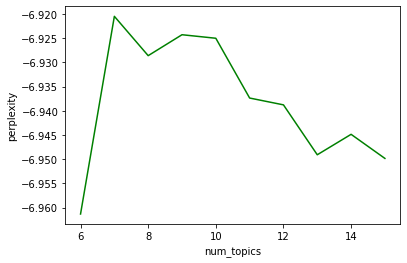

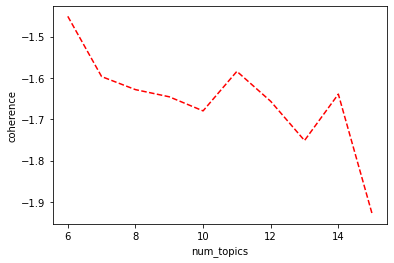

In [96]:
# 혼란도와 응집도를 이용해 최적의 토픽 수를 결정 
# 지정된 토픽 수의 범위에 따라 LDA 모델 학습 -> 이 모델에 대해 혼란도와 토픽 응집도 계산 -> 그래프 그림

def show_coherence(corpus, dictionary, start=6, end=15):
  iter_num = []
  per_value = []
  coh_value = []

  for i in range(start, end+1):
    model = LdaModel(corpus=corpus, id2word=dictionary,
                     chunksize=1000, num_topics=i,
                     random_state=7)
    
    iter_num.append(i)
    pv = model.log_perplexity(corpus)
    per_value.append(pv)

    cm = CoherenceModel(model=model, corpus=corpus, 
                        coherence='u_mass')
    cv = cm.get_coherence()
    coh_value.append(cv)
    print(f'num_topics: {i}, perplexity: {pv:.3f}, coherence: {cv:.3f}')

  plt.plot(iter_num, per_value, 'g-') 
  plt.xlabel('num_topics')
  plt.ylabel('perplexity')
  plt.show()

  plt.plot(iter_num, coh_value, 'r--')
  plt.xlabel('num_topics')
  plt.ylabel('coherence')
  plt.show()

show_coherence(corpus, dictionary, start=6, end=15)

# 혼란도는 낮을수록, 응집도는 높을수록 좋음. 
# 혼란도는 토픽 수 6에서, 응집도는 토픽 6수 에서 가장 좋음 (두 개가 다를 수 있음)


## 7.4 토픽트렌드로 시간에 따른 주제의 변화 알아내기

In [98]:
!pip install wget

import os
import wget
import ssl

# 청와대 국민청원 사이트의 만료된 청원 데이터 모음 중 전체 데이터의 5%만 임의추출한 petition_sampled.csv 사용
data_dir = 'data'
url = 'https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition_sampled.csv'
ssl._create_default_https_context = ssl._create_unverified_context 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
import pandas as pd

df = pd.read_csv(url)
df.iloc[:3]

,article_id,start,end,answered,votes,category,title,content
0,58,2017-08-19,2017-11-17,0,21,일자리,국토교통부와 한국주택협회가 행한 부당한 행위와 권력남용에 대한 내용을 청원드립니다.,안녕하세요? 존경하고 지지하는 문재인 대통령님!\n저는 성남시 분당구 정자동 주택전...
1,63,2017-08-20,2017-09-04,0,1,보건복지,살려주세요..,안녕하십니까?\n저는 올해 63세된 홀로 사는 늙은 여자입니다...\n작년 중복날 ...
2,136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...


In [114]:
# run 한참 걸림...

from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twit = Okt()

def tokenizer(doc):
    return [token for token in twit.nouns(doc) if len(token) > 1]

vec = CountVectorizer(tokenizer=tokenizer, #우선은 명사만 사용
                      max_df=0.5, min_df = 5, 
                      max_features = 1000) #적당한 대상 단어 수를 선택

pet_cv = vec.fit_transform(df.content)
print(pet_cv.shape)  # --> 총 18,077개의 문서에 대해 1,000개의 단어로 구성된 DTM생성되었고, 이 결과에 대해 LDA 수행함

(18077, 1000)


In [115]:
from sklearn.decomposition import LatentDirichletAllocation 

lda = LatentDirichletAllocation(n_components=15, n_jobs= -1, random_state=0)

%time pet_topics = lda.fit_transform(pet_cv)

def print_top_words(model, feature_names, n_top_words):
  for topic_idx, topic in enumerate(model.components_):
    print(f'Topic #{topic_idx}:', end='')
    print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words -1: -1]]))
  
print_top_words(lda, vec.get_feature_names(), 15)

CPU times: user 2.89 s, sys: 347 ms, total: 3.24 s
Wall time: 2min 13s
Topic #0:사람, 생각, 병원, 대통령, 피해자, 국민, 사건, 정말, 가족, 나라, 환자, 자신, 인간, 지금, 의사
Topic #1:북한, 우리, 한국, 대통령, 정부, 국민, 대한민국, 미국, 일본, 문재인, 국가, 문제, 생각, 나라, 우리나라
Topic #2:아이, 부모, 어린이집, 생각, 교사, 엄마, 우리, 유치원, 자녀, 가정, 동물, 출산, 아빠, 문제, 지원
Topic #3:청소년, 불법, 폐지, 보호, 장애인, 조직, 사찰, 생각, 외국인, 이용, 노인, 사회, 나이, 범죄, 사람
Topic #4:정부, 주택, 정책, 국민, 부동산, 서민, 아파트, 나라, 대통령, 세금, 지금, 사람, 투기, 집값, 임대
Topic #5:일자리, 기업, 근무, 정부, 생각, 근로자, 지원, 임금, 최저임금, 시간, 정책, 회사, 직원, 대기업, 고용
Topic #6:국민, 청원, 국회의원, 국회, 의원, 청와대, 세금, 반대, 생각, 건강, 동의, 제도, 대통령, 답변, 국가
Topic #7:관리, 내용, 대한, 조사, 관련, 판결, 공사, 사실, 업무, 판사, 확인, 해당, 주민, 발생, 민원
Topic #8:학생, 학교, 교육, 선수, 시험, 생각, 대학, 공부, 문제, 교사, 선생님, 시간, 제도, 위해, 고등학교
Topic #9:보험, 연금, 국민연금, 공무원, 지급, 방송, 국민, 소득, 가입, 국가, 기초, 보험료, 공단, 군인, 수급
Topic #10:여성, 공무원, 사회, 대한민국, 생각, 남성, 사람, 남자, 행정, 국민, 나라, 여자, 의무, 군대, 국가
Topic #11:경찰, 범죄, 국민, 사건, 위해, 대한민국, 조직, 불법, 수사, 만행, 범죄자, 경찰서, 부정부패, 검찰, 살인마
Topic #12:처벌, 피해자, 사건, 차량, 사고, 피해, 가해자, 범죄, 경우, 대한, 기사, 신고, 폭행, 행위, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [117]:
trend_data = pd.DataFrame(pet_topics, columns=['Topic'+str(i) for i in range(1,16)]) 
trend_data = pd.concat([trend_data, df.start.map(lambda x: x[:7])], axis=1)
trend_data.iloc[:5, :]

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,start
0,0.000307,0.000307,0.000307,0.058007,0.180857,0.000307,0.000307,0.757449,0.000307,0.000307,0.000307,0.000307,0.000307,0.000307,0.000307,2017-08
1,0.000813,0.000813,0.171417,0.000813,0.000813,0.057132,0.000813,0.000813,0.000813,0.140125,0.063464,0.000813,0.000813,0.000813,0.559732,2017-08
2,0.001449,0.001449,0.001449,0.001449,0.001449,0.001449,0.001449,0.001449,0.979710,0.001449,0.001449,0.001449,0.001449,0.001449,0.001449,2017-08
3,0.043334,0.642207,0.000227,0.000227,0.000227,0.253378,0.000227,0.000227,0.000227,0.000227,0.032685,0.000227,0.000227,0.000227,0.026129,2017-08
4,0.000447,0.392787,0.000447,0.000447,0.000447,0.024788,0.253386,0.021899,0.000447,0.000447,0.267475,0.000447,0.035637,0.000447,0.000447,2017-08


In [118]:
# 월별 평균
trend = trend_data.groupby(['start']).mean()
trend.iloc[:5, :]

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15
start,,,,,,,,,,,,,,,
2017-08,0.089730,0.094312,0.150915,0.012247,0.053707,0.127047,0.029538,0.088289,0.095113,0.040065,0.043216,0.015766,0.025389,0.024661,0.110004
2017-09,0.099067,0.055373,0.090419,0.282776,0.029143,0.043957,0.046928,0.039143,0.059452,0.022649,0.042948,0.023563,0.104047,0.019750,0.040786
2017-10,0.105827,0.079428,0.061719,0.037536,0.049183,0.090839,0.054206,0.065242,0.086764,0.036897,0.083816,0.053574,0.064864,0.032247,0.097858
2017-11,0.127303,0.058940,0.042874,0.028283,0.039929,0.055265,0.093545,0.053598,0.065447,0.029061,0.045919,0.045047,0.221295,0.045477,0.048018
2017-12,0.122659,0.074610,0.062640,0.036244,0.056667,0.103053,0.078535,0.067034,0.074629,0.035048,0.059587,0.027359,0.075098,0.050710,0.076128


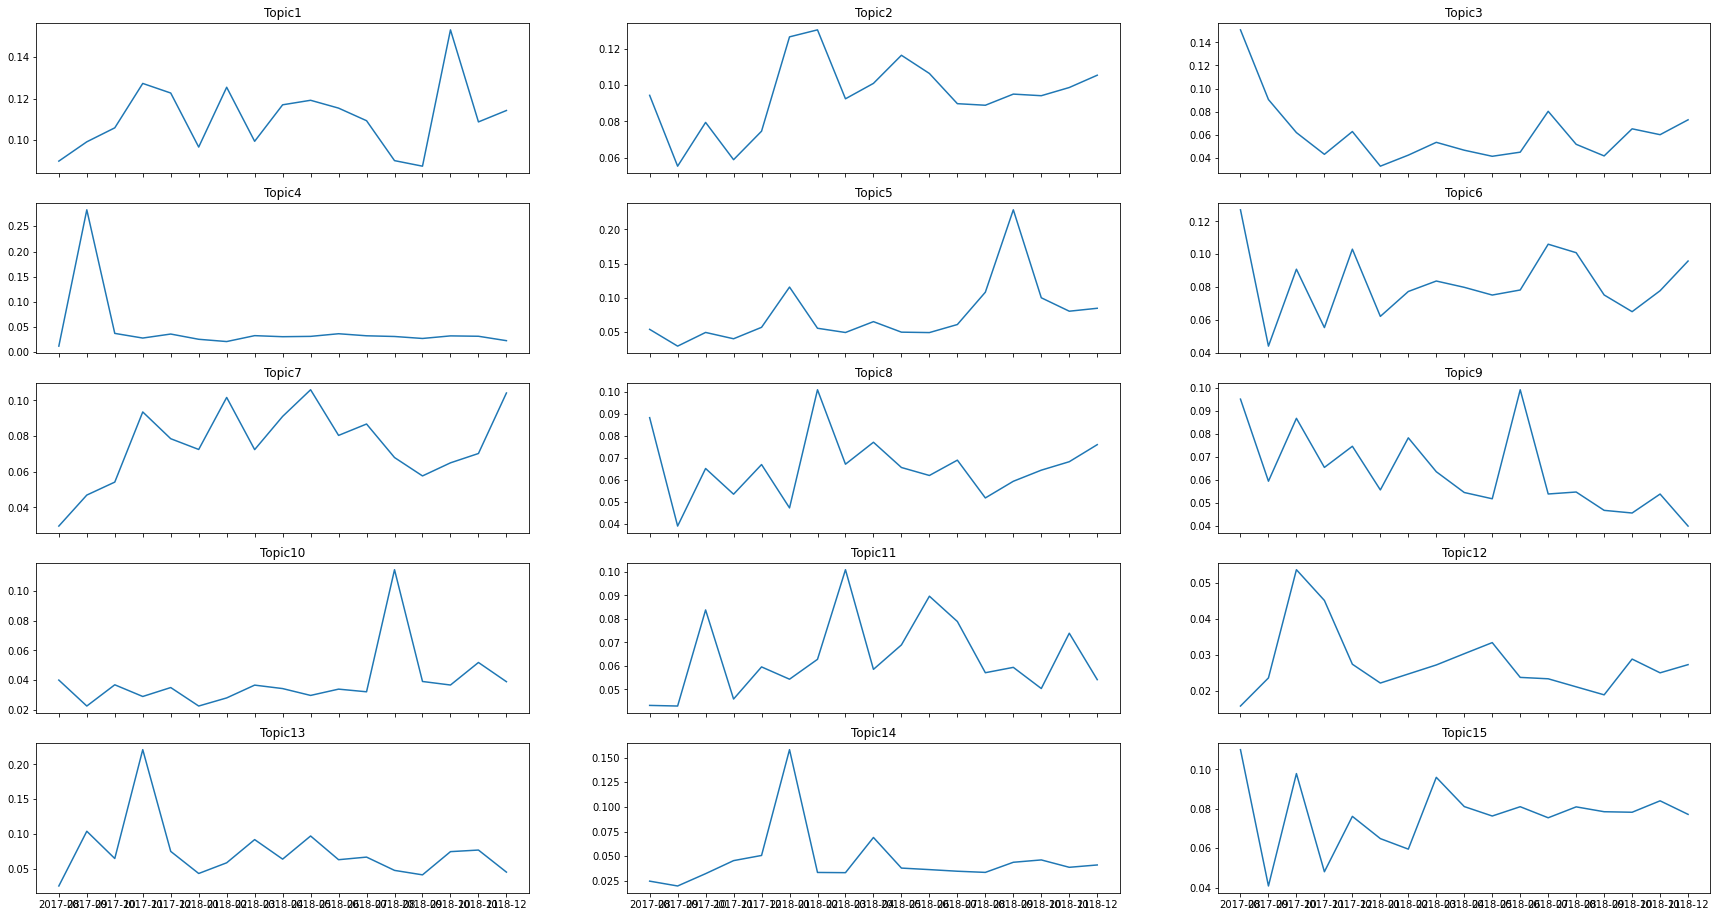

In [124]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 5x3 으로 분할 
fig, axes = plt.subplots(5,3, sharex='col', figsize=(30,16))
for col, ax in zip(trend.columns.tolist(), axes.ravel()):
  ax.set_title(col)
  ax.axes.xaxis.set_visible(True)
  ax.plot(trend[col])
plt.show()